In [1]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data into a dataframe
emissions = pd.read_csv("c02_emission_canada.csv")

In [3]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              2222 non-null   object 
 1   Model                             2222 non-null   object 
 2   Vehicle Class                     2222 non-null   object 
 3   Engine Size(L)                    2222 non-null   float64
 4   Cylinders                         2222 non-null   int64  
 5   Transmission                      2222 non-null   object 
 6   Fuel Type                         2222 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  2222 non-null   float64
 8   CO2 Emissions(g/km)               2222 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 156.4+ KB


In [4]:
#getting the first five data fro the data frame
emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


In [5]:
#renaming the column titles
emissions.rename(columns = {"Vehicle Class":"VehicleClass", "Engine Size(L)": "EngineSize", "Fuel Type":"FuelType", "Fuel Consumption Comb (L/100 km)":"FuelConsumption", "CO2 Emissions(g/km)":"CO2Emissions"}, inplace = True)

In [7]:
#obtaining the median of the engine size in litres
np.median(emissions["EngineSize"])

3.0

In [8]:
#obtaining the average fuel comsumption of all the fuel types
print(emissions.groupby(["FuelType"])["FuelConsumption"].mean())
#obtaining the average fuel consumption by make
print(min(emissions.groupby(["Make"])["FuelConsumption"].mean()))
#print(emissions.groupby(["FuelType", "Make"])["FuelConsumption"].mean())

FuelType
D     8.340000
E    17.574359
X    10.279924
Z    11.530995
Name: FuelConsumption, dtype: float64
6.45


In [8]:
#calculating the correlation between co2 emissions and fuel consumptions
emissions[["FuelConsumption", "CO2Emissions"]].corr()

,FuelConsumption,CO2Emissions
FuelConsumption,1.000000,0.901594
CO2Emissions,0.901594,1.000000


In [19]:
#average of co2 emission by vehicle class
avg_co2_by_vehicle = emissions.groupby(["VehicleClass"])["CO2Emissions"].mean()
avg_co2 = pd.DataFrame(data=avg_co2_by_vehicle, index=None, columns=["CO2Emissions"])
#comparing the co2 emissions avg between suv-small and mid size
avg_co2 =  avg_co2.reset_index()
list(avg_co2[avg_co2["VehicleClass"] == "SUV - SMALL"]["CO2Emissions"])>list(avg_co2[avg_co2["VehicleClass"] == "MID-SIZE"]["CO2Emissions"])

True

In [12]:
avg_co2

,VehicleClass,CO2Emissions
0,COMPACT,217.130194
1,FULL-SIZE,268.893855
2,MID-SIZE,223.271468
3,MINICOMPACT,238.194444
4,MINIVAN,259.827586
5,PICKUP TRUCK - SMALL,277.235294
6,PICKUP TRUCK - STANDARD,303.868421
7,SPECIAL PURPOSE VEHICLE,233.437500
8,STATION WAGON - MID-SIZE,228.142857
9,STATION WAGON - SMALL,211.070423


In [31]:
#calculating the average
avg_co2_for_all = emissions["CO2Emissions"].mean()
print(f"The averahe co2 emission for all vehicles is {avg_co2_for_all}")
enginelt2 = emissions[(emissions["EngineSize"] < 2.0 )| (emissions["EngineSize"] == 2.0)]
print(f'The average co2 emission of vehicles with engine size less than or equal to 2 is {enginelt2["CO2Emissions"].mean()}')

The averahe co2 emission for all vehicles is 251.75382538253825
The average co2 emission of vehicles with engine size less than or equal to 2 is 195.16005873715125


In [19]:
import seaborn as sns

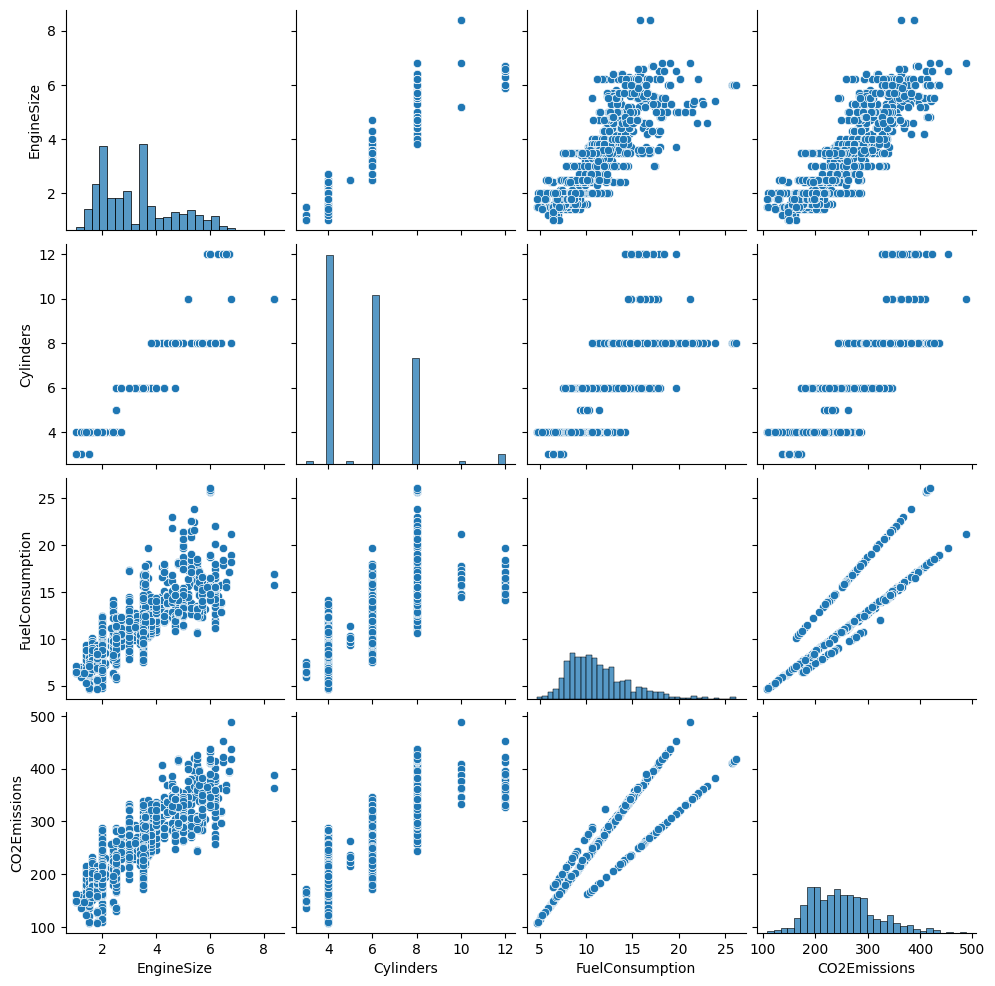

In [21]:
sns.pairplot(emissions)

the larger the engine size the higher the co2 emissions
the larger the engine size the larger the fuel consumption.
Fuel consumption and CO2 emission are positively correlated which invariably means that vehicles tha consume more fuel have higher co2 emissions.

<AxesSubplot: xlabel='CO2Emissions', ylabel='EngineSize'>

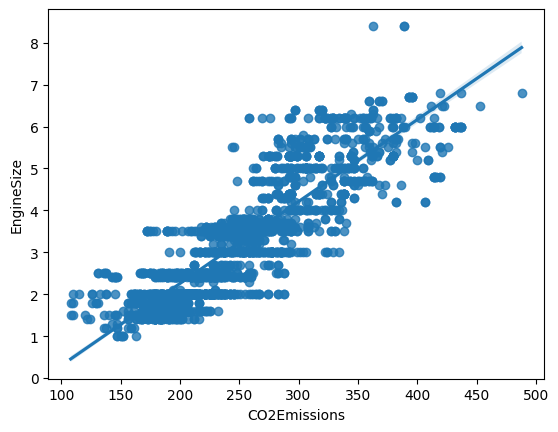

In [27]:
sns.regplot(data=emissions, x= "CO2Emissions", y= "EngineSize")

<AxesSubplot: xlabel='CO2Emissions', ylabel='Cylinders'>

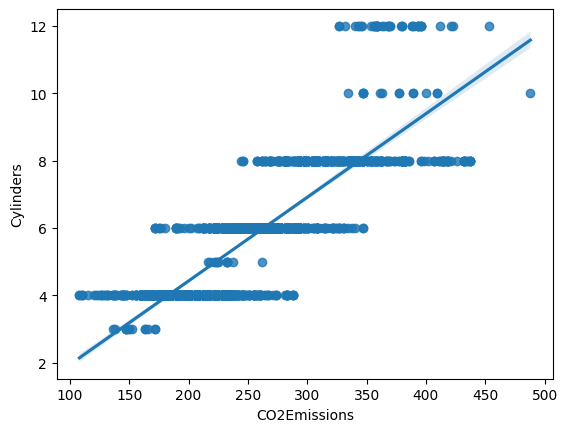

In [28]:
sns.regplot(data=emissions, x= "CO2Emissions", y= "Cylinders")

In [32]:
emissions.groupby(["FuelType"])["CO2Emissions"].mean()

FuelType
D    224.816667
E    281.160256
X    236.442436
Z    265.493194
Name: CO2Emissions, dtype: float64

In [33]:
emissions.groupby(["Cylinders"])["FuelConsumption"].mean()

Cylinders
3      6.678571
4      8.765005
5      9.969231
6     11.640617
8     15.215632
10    16.400000
12    16.125000
Name: FuelConsumption, dtype: float64

In [35]:
emissions.groupby(["EngineSize"])["FuelConsumption"].mean()

EngineSize
1.0     6.585714
1.2     6.537500
1.3     6.300000
1.4     7.921538
1.5     6.964286
1.6     8.265873
1.8     7.834177
2.0     9.008197
2.1     7.900000
2.3     9.925000
2.4     9.565942
2.5     9.127826
2.7    10.572000
3.0    10.924138
3.2    11.033333
3.3    11.521429
3.4    10.366667
3.5    11.132164
3.6    12.552778
3.7    12.183333
3.8    11.631111
4.0    13.063415
4.2    14.883333
4.3    14.844444
4.4    13.542857
4.6    15.043750
4.7    13.780952
4.8    15.142857
5.0    15.019444
5.2    15.927273
5.3    16.691667
5.4    19.637500
5.5    14.156000
5.6    14.950000
5.7    14.340625
5.8    13.200000
5.9    15.600000
6.0    18.557500
6.2    15.105085
6.3    15.050000
6.4    13.945455
6.5    18.575000
6.6    15.900000
6.7    17.150000
6.8    19.466667
8.4    16.533333
Name: FuelConsumption, dtype: float64

the larger the engine size the more fuel is consumed and emit more co2<br>
cars with more cylinders tend to consume more fuel and emit more co2<br>
Fueltype D emits the least Co2<br>
fueltype E emits the most co2<br>
fueltype D cosumes the least fuel<br>
fuel type E consumes the most fuel<br>
lamborghini consumes most fuel and emits the most co2<br>
smart consumes least fuel and emits the least co2<br>

In [36]:
emissions.groupby(["EngineSize"])["CO2Emissions"].mean()

EngineSize
1.0    151.571429
1.2    150.375000
1.3    145.000000
1.4    182.169231
1.5    160.107143
1.6    190.047619
1.8    180.316456
2.0    207.199454
2.1    213.500000
2.3    228.500000
2.4    215.398551
2.5    209.965217
2.7    243.360000
3.0    256.637931
3.2    253.800000
3.3    264.928571
3.4    238.300000
3.5    248.432749
3.6    264.022222
3.7    269.850000
3.8    267.622222
4.0    302.073171
4.2    342.416667
4.3    287.333333
4.4    311.333333
4.6    326.437500
4.7    317.690476
4.8    349.619048
5.0    311.458333
5.2    368.636364
5.3    316.972222
5.4    373.375000
5.5    325.600000
5.6    343.916667
5.7    329.750000
5.8    304.000000
5.9    360.200000
6.0    391.525000
6.2    337.406780
6.3    353.500000
6.4    320.727273
6.5    427.250000
6.6    365.666667
6.7    394.500000
6.8    448.000000
8.4    380.333333
Name: CO2Emissions, dtype: float64

In [9]:
emissions.groupby(["FuelType"])["FuelConsumption"].mean()

FuelType
D     8.340000
E    17.574359
X    10.279924
Z    11.530995
Name: FuelConsumption, dtype: float64

In [27]:
emissions.groupby(["Cylinders"])["CO2Emissions"].mean()

Cylinders
3     153.571429
4     201.056338
5     229.076923
6     259.150134
8     328.276231
10    378.933333
12    372.250000
Name: CO2Emissions, dtype: float64

In [62]:
model_by_fuel = emissions.groupby(["Model"])["CO2Emissions"].mean()
model_by_fuel = pd.DataFrame(data=model_by_fuel, index=None, columns=["CO2Emissions"])
model_by_fuel = model_.reset_index()
model_by_fuel[model_by_fuel["CO2Emissions"] == max(model_by_fuel["CO2Emissions"])]

,Model,CO2Emissions
324,E350 WAGON,488.0


In [14]:
transmissions = emissions.groupby(["Transmission"])["FuelConsumption"].mean()
transmissions = pd.DataFrame(data=transmissions, columns=["FuelConsumption"])

#transmissions = transmissions.reset_index()
transmissions


,FuelConsumption
Transmission,
A4,15.845098
A5,13.314894
A6,12.990533
A7,13.364286
A8,12.334722
A9,10.660606
AM5,6.450000
AM6,9.034211
AM7,12.157547
